#Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt

#Loading dataset

Boston dataset for house price prediction

In [ ]:
from sklearn.datasets import load_boston
df=load_boston()
dataset = pd.DataFrame(df.data)
dataset.columns=df.feature_names
warnings.simplefilter(action="ignore", category=FutureWarning)

In [3]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [4]:
df.target.shape

(506,)

In [5]:
dataset["Price"]=df.target

In [6]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [7]:
X=dataset.iloc[:,:-1] ## independent features
y=dataset.iloc[:,-1] ## dependent features

#**Ridge Regression**

Using gridsearchCV to find the optimal value of alpha

In [8]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             scoring='neg_mean_squared_error')

In [9]:
print("Optimal Value",ridge_regressor.best_params_)
print("Best Score",ridge_regressor.best_score_)

Optimal Value {'alpha': 100}
Best Score -29.905701947540344


In [10]:
cofficient_ridge=ridge_regressor.best_estimator_.coef_ #Saving the cofficient for each feature

In [11]:
np.round(cofficient_ridge,3)

array([-1.020e-01,  5.400e-02, -5.300e-02,  6.380e-01, -2.630e-01,
        2.335e+00,  1.000e-03, -1.153e+00,  3.150e-01, -1.600e-02,
       -8.290e-01,  9.000e-03, -6.610e-01])

In [12]:
#We can observe that there is no weight which is zero

#**Lasso**

In [13]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print("Optimal Value",lasso_regressor.best_params_)
print("Best Square",lasso_regressor.best_score_)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.633e+03, tolerance: 3.919e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.764e+03, tolerance: 3.307e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

Optimal Value {'alpha': 1}
Best Square -35.531580220694856


In [14]:
cofficient_lasso= lasso_regressor.best_estimator_.coef_

# Comparison

In [15]:
comparison=[[abs(np.round(cofficient_ridge[i],4)),abs(np.round(cofficient_lasso[i],4))] for i in range(5)]
df=pd.DataFrame(comparison,columns=["Ridge","Lasso"] )
print("Following table provides the comparison of the cofficient of ridge and lasso\n")
df

Following table provides the comparison of the cofficient of ridge and lasso



,Ridge,Lasso
0,0.1022,0.0634
1,0.0545,0.0492
2,0.0528,0.0000
3,0.6383,0.0000
4,0.2628,0.0000


Basic Visualization

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

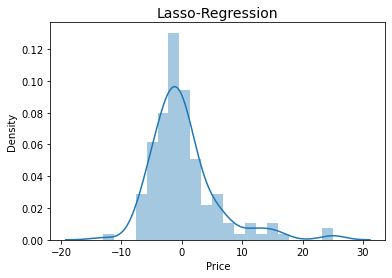

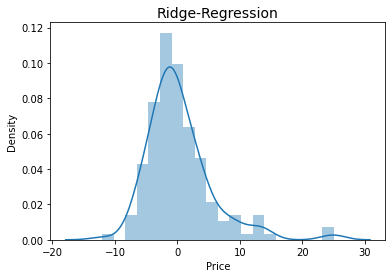

In [17]:
import seaborn as sns
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.title("Lasso-Regression",fontsize=14,pad=5)
sns.distplot(y_test-prediction_lasso)
plt.show()
plt.title("Ridge-Regression",fontsize=14,pad=5)
sns.distplot(y_test-prediction_ridge)
plt.show()